<a href="https://colab.research.google.com/github/redman157/HocML/blob/master/PCA-iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from __future__ import division, print_function
import pandas as pd
import os 
import numpy as np
import requests
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
from scipy.stats import norm
from scipy import stats 

datasets = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
name = ['SepalLength','SepalWidth','PetalLength','PetalWidth','Species']
def download_data(path):
  filename = (path.split('/')[-1])
  dir = os.path.join(os.path.abspath(os.path.dirname(filename)))
  r = requests.get(path,allow_redirects=True, stream = True,verify = False)
  if r.status_code == 200:    
    with open(dir + '/' + filename ,'wb') as f:
      f.write(r.content)
download_data(datasets)
print(os.path.join(datasets + '.csv'))
iris = pd.read_csv(datasets,names = name)

/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data.csv


In [0]:
data = iris.drop('Species',axis = 1 )
target = iris['Species']


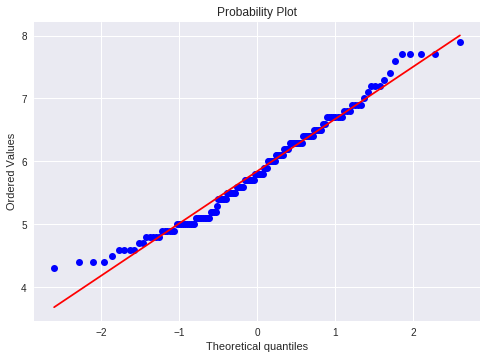

In [0]:
fig = plt.figure()
res = stats.probplot(iris.SepalLength,plot= plt)

In [40]:
epoch = data.shape[0]
X = data.values
y = target
w = np.random.rand(4,150)
iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [0]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

pca = PCA(n_components=2)
PC = pca.fit_transform(X)
pcdf = pd.DataFrame(data = PC,columns = ['principal component 1', 'principal component 2'])

In [0]:
data_PCA = pd.concat([pcdf,target],axis = 1)

In [26]:
data_PCA.head()

,principal component 1,principal component 2,Species
0,-2.684207,0.326607,Iris-setosa
1,-2.715391,-0.169557,Iris-setosa
2,-2.889820,-0.137346,Iris-setosa
3,-2.746437,-0.311124,Iris-setosa
4,-2.728593,0.333925,Iris-setosa


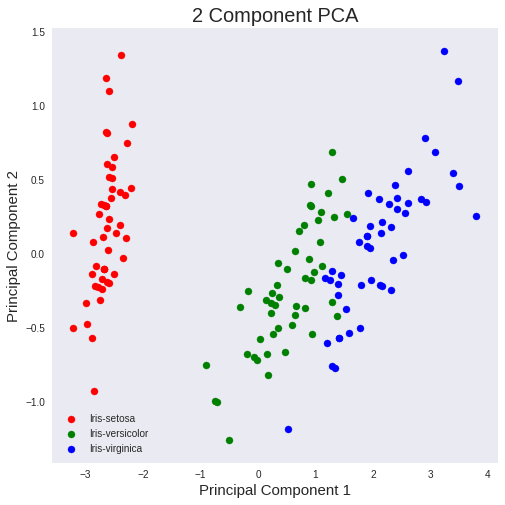

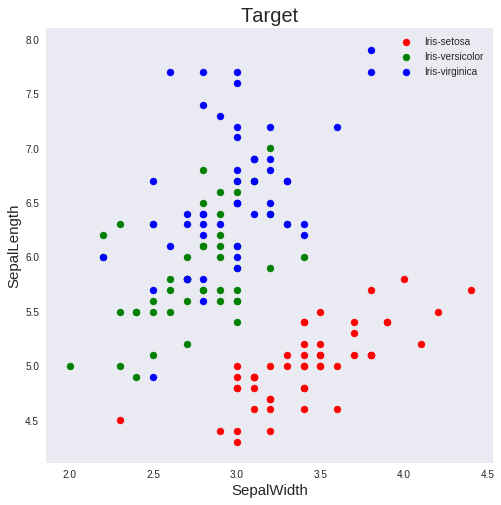

In [43]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 

ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)

targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']

for target, color in zip(targets,colors):
    index_target = data_PCA['Species'] == target
    # lấy tất cả các index_target tương ứng với target[1] 
    ax.scatter(data_PCA.loc[index_target, 'principal component 1'],
               data_PCA.loc[index_target, 'principal component 2'],
               c = color,
               s = 50)
ax.legend(targets)
ax.grid()  

fig_1 = plt.figure(figsize = (8,8))
ax = fig_1.add_subplot(1,1,1) 

ax.set_xlabel('SepalWidth', fontsize = 15)
ax.set_ylabel('SepalLength', fontsize = 15)
ax.set_title('Original', fontsize = 20)

targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']

for target, color in zip(targets,colors):
    index_target = iris['Species'] == target
    # lấy tất cả các index_target tương ứng với target[1] 
    ax.scatter(iris.loc[index_target, 'SepalWidth'],
               iris.loc[index_target, 'SepalLength'],
               c = color,
               s = 50)
ax.legend(targets)
ax.grid()  
